In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.api as sms

<br>

## Merge Data

In [139]:
d = pd.read_csv(r'https://raw.githubusercontent.com/GrzegorzPus/NBA_analysis/main/Data/draft-data-20-years.csv')
d.head(3)

,Unnamed: 0,Rk,Pk,Tm,Player,College,Yrs,G,TOTMP,TOTPTS,...,WS/48,BPM,VORP,DraftYr,MPG,PPG,RPG,APG,playerurl,DraftYear
0,1,1,1,BRK,Derrick Coleman,Syracuse,15.0,781.0,25903.0,12884.0,...,0.119,1.4,22.3,1990,33.2,16.5,9.3,2.5,https://www.sports-reference.com/cbb/players/d...,1990
1,2,2,2,OKC,Gary Payton,Oregon State,17.0,1335.0,47117.0,21813.0,...,0.148,3.3,62.5,1990,35.3,16.3,3.9,6.7,https://www.sports-reference.com/cbb/players/g...,1990
2,3,3,3,DEN,Mahmoud Abdul-Rauf,LSU,9.0,586.0,15628.0,8553.0,...,0.077,-0.8,4.5,1990,26.7,14.6,1.9,3.5,https://www.sports-reference.com/cbb/players/m...,1990


In [140]:
d2 = pd.read_csv('https://raw.githubusercontent.com/GrzegorzPus/NBA_analysis/main/Data/player_data.csv')

In [141]:
merged_df = d.merge(d2, on='Player', how='left')
merged_df = merged_df.drop(['playerurl', 'From', 'To','Colleges'], axis=1)

In [142]:
merged_df.head(3)

,Unnamed: 0,Rk,Pk,Tm,Player,College,Yrs,G,TOTMP,TOTPTS,...,DraftYr,MPG,PPG,RPG,APG,DraftYear,Pos,Ht,Wt,Birth Date
0,1,1,1,BRK,Derrick Coleman,Syracuse,15.0,781.0,25903.0,12884.0,...,1990,33.2,16.5,9.3,2.5,1990,F-C,6-10,230.0,June 21 1967
1,2,2,2,OKC,Gary Payton,Oregon State,17.0,1335.0,47117.0,21813.0,...,1990,35.3,16.3,3.9,6.7,1990,NaN,NaN,NaN,NaN
2,3,3,3,DEN,Mahmoud Abdul-Rauf,LSU,9.0,586.0,15628.0,8553.0,...,1990,26.7,14.6,1.9,3.5,1990,G,6-1,162.0,March 9 1969


In [143]:
d3 = pd.read_csv(r"C:\Users\GRZEGORZ\OneDrive\Pulpit\Portfolio_Projects\players.csv")

In [144]:
d3 = d3.rename(columns={'name': 'Player'})
selected_columns = d3[["Player"] + list(d3.columns[1:3]) + ["height"] + list(d3.columns[21:24])]
result = pd.merge(d, selected_columns, on="Player", how="left")

In [145]:
merged_df1 = merged_df[['Player', 'Ht']]
result1 = result[['Player', 'height']]

merged_df1 = merged_df1.merge(result1, on='Player', how='left')
merged_df1['Ht'].fillna(merged_df1['height'], inplace=True)
merged_df1.drop('height', axis=1, inplace=True)

merged_df2 = merged_df[['Player', 'Wt']]
result2 = result[['Player', 'weight']]

merged_df2 = merged_df2.merge(result2, on='Player', how='left')
merged_df2['Wt'].fillna(merged_df2['weight'], inplace=True)
merged_df2.drop('weight', axis=1, inplace=True)

merged_df3 = merged_df[['Player', 'Birth Date']]
result3 = result[['Player', 'birthDate']]

merged_df3 = merged_df3.merge(result3, on='Player', how='left')
merged_df3['Birth Date'].fillna(merged_df3['birthDate'], inplace=True)
merged_df3.drop('birthDate', axis=1, inplace=True)

In [146]:
m = pd.merge(merged_df1, merged_df2, on="Player", how="left")

In [147]:
merged_all = pd.merge(m, merged_df3, on="Player", how="left")

In [148]:
aw = pd.merge(d, merged_all, on="Player", how="left")

<br>

## Advanced Career Statistics

In [149]:
data = aw.drop_duplicates().reset_index()

In [150]:
data.rename(columns={'Ht':'Height', 'Wt': 'Weight'}, inplace=True)

In [151]:
col_to_drop = ['playerurl', 'Rk', 'DraftYr', 'WS', 'College', 'index', 'Unnamed: 0']
data = data.drop(columns=col_to_drop)
data.head(3)

,Pk,Tm,Player,Yrs,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,...,BPM,VORP,MPG,PPG,RPG,APG,DraftYear,Height,Weight,Birth Date
0,1,BRK,Derrick Coleman,15.0,781.0,25903.0,12884.0,7232.0,1985.0,0.447,...,1.4,22.3,33.2,16.5,9.3,2.5,1990,6-10,230.0,June 21 1967
1,2,OKC,Gary Payton,17.0,1335.0,47117.0,21813.0,5269.0,8966.0,0.466,...,3.3,62.5,35.3,16.3,3.9,6.7,1990,6-4,180lb,"July 23, 1968"
2,3,DEN,Mahmoud Abdul-Rauf,9.0,586.0,15628.0,8553.0,1087.0,2079.0,0.442,...,-0.8,4.5,26.7,14.6,1.9,3.5,1990,6-1,162.0,March 9 1969


- **Pk**: Draft pick oznacza to, że dana drużyna ma prawo do wyboru określonego zawodnika na określonej pozycji w hierarchii draftu
- **Tm**: Drużyna
- **Player**: Zawodnik
- **Yrs**: Lata spędzone w lidze NBA
- **G**: Rozegrane mecze w całej karierze
- **TOTMP**: Łączna ilość minut rozegranych przez zawodnika w karierze
- **TOTPTS**: Łączna ilość zdobytych punktów zawodnika w karierze
- **TOTTRB**: Łączna ilość zbiórek zawodnika w karierze
- **TOTAST**: Łączna ilość asyst zawodnika w karierze
- **FG%**: Procent trafionych rzutów przez zawodnika w karierze
- **3P%**: Procent trafionych rzutów za 3 punkty przez zawodnika w karierze
- **FT%**: Procent trafionych rzutów wolnych przez zawodnika w karierze
- **WS/48**: Udziały zawodnika w zwycięstwach na 48 minut
- **BPM**: Wskaźnik, który szacuje wkład zawodnika, gdy ten jest na boisku
- **VORP**: Szacunkowa liczbę punktów na 100 posiadań drużyny, które zawodnik zdobywa w stosunku do gracza zmieniającego go
- **MPG**: Średnia liczba minut rozegranych przez zawodnika w meczu
- **PPG**: Średnia liczba punktów zdobytych przez zawodnika w meczu
- **RPG**: Średnia liczba zbiórek zdobywych przez zawodnika w meczu
- **APG**: Średnia liczba asyst zdobywanych przez zawodnika w meczu
- **DraftYear**: Rok w którym zawodnik trafił do ligi NBA
- **Height**: Wzrost zawodnika
- **Weight**: Waga zawodnika
- **Birth Date**: Data urodzenia zawodnika

<br>

### Clean data

In [152]:
# Remove duplicates
data = data.reset_index()

In [153]:
data = data[~data['index'].between(497, 503)]
data = data[~data['index'].between(454, 479)]
data = data[~data['index'].between(156, 162)]
data = data[~data['index'].between(969, 975)]
data = data[~data['index'].between(19, 25)]
data = data[~data['index'].between(1057, 1062)]
data = data[~data['index'].isin([1055, 1803, 568, 1625])]
data = data[~data['index'].between(61, 67)]
data = data[~data['index'].between(1417, 1423)]
data = data[~data['index'].between(353, 359)]
data = data[~data['index'].between(1491, 1497)]
data = data[~data['index'].between(1211, 1217)]
data = data[~data['index'].between(1819, 1825)]
data = data[~data['index'].between(271, 277)]
data = data[~data['index'].between(739, 741)]
data = data[~data['index'].between(322, 328)]
data = data[~data['index'].between(883, 889)]
data = data[~data['index'].between(1029, 1031)]
data = data[~data['index'].between(1109, 1111)]
data = data[~data['index'].between(754, 760)]

In [154]:
data = data.drop('index', axis=1)

<br>

In [155]:
def remove_lb(x):
    if 'lb' in str(x):
        return x.replace('lb', '')
    else:
        return x

# Remove 'lb' from the 'Weight' rack and keep the numeric or NaN value
data['Weight'] = data['Weight'].apply(remove_lb)

In [156]:
data['Weight'] = data['Weight'].astype(float).astype('Int64')
data['Weight'] = data['Weight'] * 0.45359237
data['Weight'] = round(data['Weight'])

<br>

In [157]:
data['Height'] = data['Height'].str.replace('-', '.')
data['Height'] = data['Height'].astype(float)

In [158]:
def feet_to_cm(height):
    if not np.isnan(height):
        feet = int(height)
        inches = (height - feet) * 12
        cm = (feet * 12 + inches) * 2.54
        return cm
    else:
        return np.nan

data['Height'] = data['Height'].apply(feet_to_cm)
data['Height'] = round(data['Height'])

In [159]:
data['Birth Date'] = pd.to_datetime(data['Birth Date'])

In [160]:
data = data[~data['DraftYear'].between(2019, 2022)]

In [161]:
data

,Pk,Tm,Player,Yrs,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,...,BPM,VORP,MPG,PPG,RPG,APG,DraftYear,Height,Weight,Birth Date
0,1,BRK,Derrick Coleman,15.0,781.0,25903.0,12884.0,7232.0,1985.0,0.447,...,1.4,22.3,33.2,16.5,9.3,2.5,1990,186.0,104.0,1967-06-21
1,2,OKC,Gary Payton,17.0,1335.0,47117.0,21813.0,5269.0,8966.0,0.466,...,3.3,62.5,35.3,16.3,3.9,6.7,1990,195.0,82.0,1968-07-23
2,3,DEN,Mahmoud Abdul-Rauf,9.0,586.0,15628.0,8553.0,1087.0,2079.0,0.442,...,-0.8,4.5,26.7,14.6,1.9,3.5,1990,186.0,73.0,1969-03-09
3,4,ORL,Dennis Scott,10.0,629.0,17983.0,8094.0,1774.0,1296.0,0.417,...,0.2,9.9,28.6,12.9,2.8,2.1,1990,207.0,104.0,1968-09-05
4,5,CHA,Kendall Gill,15.0,966.0,29481.0,12914.0,4002.0,2945.0,0.434,...,0.1,15.8,30.5,13.4,4.1,3.0,1990,198.0,88.0,1968-05-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,56,PHI,Ray Spalding,2.0,16.0,167.0,58.0,52.0,5.0,0.529,...,-6.2,-0.2,10.4,3.6,3.3,0.3,2018,186.0,98.0,1997-03-11
1817,57,OKC,Kevin Hervey,1.0,10.0,52.0,17.0,12.0,5.0,0.259,...,-5.1,0.0,5.2,1.7,1.2,0.5,2018,210.0,104.0,1996-07-09
1818,58,DEN,Thomas Welsh,1.0,11.0,36.0,18.0,4.0,5.0,0.538,...,1.2,0.0,3.3,1.6,0.4,0.5,2018,213.0,116.0,1996-02-03
1826,59,PHO,George King,2.0,5.0,25.0,1.0,6.0,0.0,0.000,...,-17.0,-0.1,5.0,0.2,1.2,0.0,2018,201.0,102.0,1994-01-15


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 0 to 1827
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Pk          1685 non-null   int64         
 1   Tm          1685 non-null   object        
 2   Player      1685 non-null   object        
 3   Yrs         1452 non-null   float64       
 4   G           1452 non-null   float64       
 5   TOTMP       1452 non-null   float64       
 6   TOTPTS      1452 non-null   float64       
 7   TOTTRB      1452 non-null   float64       
 8   TOTAST      1452 non-null   float64       
 9   FG%         1448 non-null   float64       
 10  3P%         1337 non-null   float64       
 11  FT%         1422 non-null   float64       
 12  WS/48       1451 non-null   float64       
 13  BPM         1451 non-null   float64       
 14  VORP        1452 non-null   float64       
 15  MPG         1452 non-null   float64       
 16  PPG         1452 non-nul

In [163]:
def highlight_high_corr(val):
    if val == 1.0:
        return ''
    color = 'background-color: lightgreen' if abs(val) >= 0.9 else ''
    return color

styled_corr_matrix = data.corr().style.applymap(highlight_high_corr)
styled_corr_matrix

,Pk,Yrs,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,DraftYear,Height,Weight
Pk,1.000000,-0.460646,-0.468060,-0.482300,-0.473921,-0.455244,-0.366866,-0.169033,-0.096962,-0.157231,-0.218324,-0.306261,-0.335738,-0.552846,-0.534230,-0.467391,-0.347048,0.053602,-0.008140,-0.067493
Yrs,-0.460646,1.000000,0.974870,0.917781,0.832976,0.811382,0.689401,0.285093,0.151704,0.262326,0.395287,0.501531,0.619328,0.742772,0.647793,0.575696,0.471284,-0.238727,-0.002479,0.034622
G,-0.468060,0.974870,1.000000,0.960336,0.878123,0.842000,0.737019,0.275567,0.172523,0.285933,0.393738,0.509016,0.664224,0.780323,0.688240,0.590883,0.514967,-0.218602,-0.012772,0.015262
TOTMP,-0.482300,0.917781,0.960336,1.000000,0.958556,0.866992,0.817703,0.234953,0.200203,0.294852,0.374945,0.511337,0.786111,0.828846,0.777763,0.606887,0.599083,-0.189400,-0.019793,-0.012116
TOTPTS,-0.473921,0.832976,0.878123,0.958556,1.000000,0.829627,0.817536,0.215166,0.221258,0.310107,0.365252,0.508452,0.863397,0.804198,0.848701,0.585677,0.615177,-0.138444,-0.020402,-0.012174
TOTTRB,-0.455244,0.811382,0.842000,0.866992,0.829627,1.000000,0.560730,0.336646,-0.005319,0.118733,0.385937,0.462499,0.720462,0.704705,0.661777,0.828769,0.347378,-0.156520,0.057359,0.240798
TOTAST,-0.366866,0.689401,0.737019,0.817703,0.817536,0.560730,1.000000,0.096637,0.250573,0.303751,0.281748,0.443028,0.790519,0.677825,0.672376,0.317281,0.847736,-0.123040,-0.164223,-0.230584
FG%,-0.169033,0.285093,0.275567,0.234953,0.215166,0.336646,0.096637,1.000000,-0.018315,-0.114657,0.708820,0.599166,0.168960,0.291813,0.279757,0.476825,0.051262,0.009748,0.053754,0.298226
3P%,-0.096962,0.151704,0.172523,0.200203,0.221258,-0.005319,0.250573,-0.018315,1.000000,0.390216,0.216386,0.369361,0.173417,0.295590,0.317004,-0.100096,0.335193,0.158619,-0.121367,-0.367539
FT%,-0.157231,0.262326,0.285933,0.294852,0.310107,0.118733,0.303751,-0.114657,0.390216,1.000000,0.206207,0.301620,0.217280,0.383559,0.401020,0.020898,0.365912,0.066404,-0.146850,-0.348403


In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 0 to 1827
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Pk          1685 non-null   int64         
 1   Tm          1685 non-null   object        
 2   Player      1685 non-null   object        
 3   Yrs         1452 non-null   float64       
 4   G           1452 non-null   float64       
 5   TOTMP       1452 non-null   float64       
 6   TOTPTS      1452 non-null   float64       
 7   TOTTRB      1452 non-null   float64       
 8   TOTAST      1452 non-null   float64       
 9   FG%         1448 non-null   float64       
 10  3P%         1337 non-null   float64       
 11  FT%         1422 non-null   float64       
 12  WS/48       1451 non-null   float64       
 13  BPM         1451 non-null   float64       
 14  VORP        1452 non-null   float64       
 15  MPG         1452 non-null   float64       
 16  PPG         1452 non-nul

<br>

In [165]:
df = data.dropna()

In [166]:
new_order = ['Yrs'] + [col for col in df.columns if col != 'Yrs']
df = df[new_order]

In [167]:
data_matrix = df.drop(columns=['Tm', 'Player', 'Birth Date'])

In [168]:
data_matrix.insert(1, 'Const', 1)

In [169]:
data_matrix

,Yrs,Const,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,...,WS/48,BPM,VORP,MPG,PPG,RPG,APG,DraftYear,Height,Weight
0,15.0,1,1,781.0,25903.0,12884.0,7232.0,1985.0,0.447,0.295,...,0.119,1.4,22.3,33.2,16.5,9.3,2.5,1990,186.0,104.0
1,17.0,1,2,1335.0,47117.0,21813.0,5269.0,8966.0,0.466,0.317,...,0.148,3.3,62.5,35.3,16.3,3.9,6.7,1990,195.0,82.0
2,9.0,1,3,586.0,15628.0,8553.0,1087.0,2079.0,0.442,0.354,...,0.077,-0.8,4.5,26.7,14.6,1.9,3.5,1990,186.0,73.0
3,10.0,1,4,629.0,17983.0,8094.0,1774.0,1296.0,0.417,0.397,...,0.089,0.2,9.9,28.6,12.9,2.8,2.1,1990,207.0,104.0
4,15.0,1,5,966.0,29481.0,12914.0,4002.0,2945.0,0.434,0.300,...,0.078,0.1,15.8,30.5,13.4,4.1,3.0,1990,198.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813,1.0,1,53,11.0,81.0,20.0,7.0,13.0,0.200,0.235,...,-0.116,-6.7,-0.1,7.4,1.8,0.6,1.2,2018,189.0,98.0
1814,4.0,1,54,154.0,3289.0,1589.0,367.0,403.0,0.446,0.361,...,0.088,-1.8,0.2,21.4,10.3,2.4,2.6,2018,198.0,93.0
1816,2.0,1,56,16.0,167.0,58.0,52.0,5.0,0.529,0.000,...,0.024,-6.2,-0.2,10.4,3.6,3.3,0.3,2018,186.0,98.0
1818,1.0,1,58,11.0,36.0,18.0,4.0,5.0,0.538,0.429,...,0.162,1.2,0.0,3.3,1.6,0.4,0.5,2018,213.0,116.0


<br>

## Ordinary Least Square Method

In [170]:
y = data_matrix['Yrs'].to_numpy()

In [171]:
X = data_matrix.iloc[:, 1:].values
X = X.astype(float)

<br>

In [172]:
X_T = np.transpose(X)

In [173]:
X_TX = np.dot(X_T, X)

In [174]:
X_TX_inv = np.linalg.inv(X_TX)

In [175]:
X_Ty = np.dot(X_T, y)

In [176]:
beta_hat = np.dot(X_TX_inv, X_Ty)
beta_hat = [round(x, 4) for x in beta_hat]

In [177]:
beta_hat 

[34.6842,
 -0.0022,
 0.0171,
 -0.0002,
 0.0001,
 -0.0,
 -0.0,
 -0.4006,
 0.0755,
 -0.4926,
 0.385,
 0.0201,
 0.0053,
 0.0104,
 -0.0142,
 0.0129,
 -0.0176,
 -0.0167,
 0.0017,
 0.0053]

<br>

In [178]:
y_hat = np.dot(X,beta_hat)

In [179]:
eps_hat = y_hat - y

In [180]:
SKR = np.dot(np.transpose(eps_hat), eps_hat)

In [181]:
s2 = SKR/(1436-20)

In [182]:
s2

1.0232045210853247

In [183]:
# Covariance matrix
cov_matrix = s2 * X_TX_inv

In [184]:
D = np.sqrt(np.diag(cov_matrix))
D = [round(x, 4) for x in D]

In [185]:
D

[7.4144,
 0.0022,
 0.0004,
 0.0,
 0.0,
 0.0001,
 0.0001,
 0.7664,
 0.2847,
 0.3364,
 1.4135,
 0.0328,
 0.0069,
 0.018,
 0.0311,
 0.0517,
 0.0677,
 0.0037,
 0.0029,
 0.0038]

<br>

In [186]:
import statsmodels.api as sm

In [187]:
# Utworzenie modelu regresji liniowej
model = sm.OLS(y, X).fit()

In [188]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     1355.
Date:                Tue, 14 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:52:25   Log-Likelihood:                -1809.1
No. Observations:                1284   AIC:                             3658.
Df Residuals:                    1264   BIC:                             3761.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.6842      7.314      4.742      0.000      20.335      49.033
x1            -0.0022      0.002     -1.025      0.305      -0.006       0.002
x2             0.0171      0.000     41.275      0.000       0.016       0.018
x3            -0.0002    3.1e-05     -5.114      0.000      -0.000   -9.78e-05
x4          7.541e-05   4.67e-05      1.614      0.107   -1.62e-05       0.000
x5         -3.279e-05   6.81e-05     -0.482      0.630      -0.000       0.000
x6         -7.621e-06   9.55e-05     -0.080      0.936      -0.000       0.000
x7            -0.4006      0.756     -0.530      0.596      -1.884       1.083
x8             0.0755      0.281      0.269      0.788      -0.475       0.627
x9            -0.4926      0.332     -1.484      0.138      -1.144       0.158
x10            0.3850      1.394      0.276      0.783      -2.350       3.120
x11            0.0201      0.032      0.622      0.534      -0.043       0.084
x12            0.0053      0.007      0.784      0.433      -0.008       0.019
x13            0.0104      0.018      0.589      0.556      -0.024       0.045
x14           -0.0142      0.031     -0.464      0.642      -0.074       0.046
x15            0.0129      0.051      0.253      0.800      -0.087       0.113
x16           -0.0176      0.067     -0.264      0.792      -0.149       0.113
x17           -0.0167      0.004     -4.552      0.000      -0.024      -0.009
x18            0.0017      0.003      0.596      0.551      -0.004       0.007
x19            0.0053      0.004      1.406      0.160      -0.002       0.013
==============================================================================
Omnibus:                      211.330   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              478.935
Skew:                           0.922   Prob(JB):                    1.00e-104
Kurtosis:                       5.356   Cond. No.                     4.17e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<br>

## Test istotności parametrów

In [189]:
# Obliczenie błędów standardowych estymatorów współczynników
SE = model.bse

In [190]:
# Obliczenie t-statystyk
t_values = model.tvalues

In [191]:
# Obliczenie wartości p
p_values = model.pvalues

In [192]:
for i, value in enumerate(p_values):
    print(f'Parametr {i}: {round(value,3)}')

Parametr 0: 0.0
Parametr 1: 0.305
Parametr 2: 0.0
Parametr 3: 0.0
Parametr 4: 0.107
Parametr 5: 0.63
Parametr 6: 0.936
Parametr 7: 0.596
Parametr 8: 0.788
Parametr 9: 0.138
Parametr 10: 0.783
Parametr 11: 0.534
Parametr 12: 0.433
Parametr 13: 0.556
Parametr 14: 0.642
Parametr 15: 0.8
Parametr 16: 0.792
Parametr 17: 0.0
Parametr 18: 0.551
Parametr 19: 0.16


In [193]:
alpha = 0.05

# Testowanie istotności parametrów
significant_params = [i for i in range(len(beta_hat)) if p_values[i] < alpha]

In [194]:
# Wypisanie wyników
for i in significant_params:
    print(f'Parametr {i}:')
    print(f'Wartość estymowana: {beta_hat[i]}')
    print(f'Błąd standardowy: {SE[i]}')
    print(f't-statystyka: {t_values[i]}')
    print(f'Wartość p: {p_values[i]}')
    if p_values[i] < alpha:
        print('Parametr jest istotny statystycznie na poziomie istotności 0.05\n')
    else:
        print('Parametr nie jest istotny statystycznie na poziomie istotności 0.05\n')

Parametr 0:
Wartość estymowana: 34.6842
Błąd standardowy: 7.313976818998227
t-statystyka: 4.74217799387402
Wartość p: 2.3543442820588302e-06
Parametr jest istotny statystycznie na poziomie istotności 0.05

Parametr 2:
Wartość estymowana: 0.0171
Błąd standardowy: 0.00041547277560050614
t-statystyka: 41.27547369626146
Wartość p: 1.6188879984239391e-236
Parametr jest istotny statystycznie na poziomie istotności 0.05

Parametr 3:
Wartość estymowana: -0.0002
Błąd standardowy: 3.1024919685195844e-05
t-statystyka: -5.1144697973645545
Wartość p: 3.632019303467758e-07
Parametr jest istotny statystycznie na poziomie istotności 0.05

Parametr 17:
Wartość estymowana: -0.0167
Błąd standardowy: 0.003665974487055247
t-statystyka: -4.552244797685063
Wartość p: 5.819174016555875e-06
Parametr jest istotny statystycznie na poziomie istotności 0.05



<br>

## Test Breuscha-Pagana

In [195]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model.resid, X)

print("Test Breuscha-Pagana:")
print(f"F-statistic: {bp_test[0]}")
print(f"P-value: {bp_test[1]}")

Test Breuscha-Pagana:
F-statistic: 43.60439579100891
P-value: 0.0010709340982897185


<br>

## Test Shapiro-Wilka

In [196]:
residue = model.resid

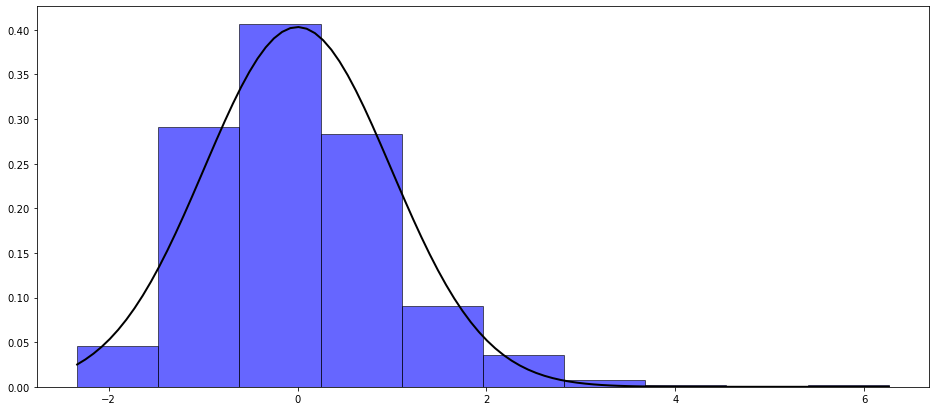

In [197]:
plt.figure(figsize=(16,7))
plt.hist(residue, bins=10, density=True, alpha=0.6, color='b', edgecolor='black')

# Wykres gęstości rozkładu normalnego
xmin, xmax = min(residue), max(residue)
x = np.linspace(xmin, xmax, 100)
mu, std = np.mean(residue), np.std(residue)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

In [198]:
from scipy import stats
shapiro_test_statistic, shapiro_p_value = stats.shapiro(residue)
print(f'Statystyka testu Shapiro-Wilka: {shapiro_test_statistic}')
print(f'Wartość P-Value: {shapiro_p_value}')

Statystyka testu Shapiro-Wilka: 0.9614447951316833
Wartość P-Value: 6.0488864422889606e-18


In [199]:
jb = sms.jarque_bera(model.resid)
print("Statystyka testu Jarque-Bera:", jb[0])
print("Wartość P-Value:", jb[1])

Statystyka testu Jarque-Bera: 478.9347717112206
Wartość P-Value: 1.001464887671722e-104


<br>

In [200]:
data_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1284 entries, 0 to 1826
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Yrs        1284 non-null   float64
 1   Const      1284 non-null   int64  
 2   Pk         1284 non-null   int64  
 3   G          1284 non-null   float64
 4   TOTMP      1284 non-null   float64
 5   TOTPTS     1284 non-null   float64
 6   TOTTRB     1284 non-null   float64
 7   TOTAST     1284 non-null   float64
 8   FG%        1284 non-null   float64
 9   3P%        1284 non-null   float64
 10  FT%        1284 non-null   float64
 11  WS/48      1284 non-null   float64
 12  BPM        1284 non-null   float64
 13  VORP       1284 non-null   float64
 14  MPG        1284 non-null   float64
 15  PPG        1284 non-null   float64
 16  RPG        1284 non-null   float64
 17  APG        1284 non-null   float64
 18  DraftYear  1284 non-null   int64  
 19  Height     1284 non-null   float64
 20  Weight  

In [201]:
data_matrix.corr().style.applymap(highlight_high_corr)

,Yrs,Const,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,DraftYear,Height,Weight
Yrs,1.000000,nan,-0.430655,0.973188,0.914607,0.826973,0.805451,0.679456,0.345822,0.143805,0.219559,0.477559,0.543719,0.621056,0.720850,0.620075,0.560831,0.432523,-0.266797,0.031737,0.121214
Const,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Pk,-0.430655,nan,1.000000,-0.444202,-0.468799,-0.466181,-0.438773,-0.361235,-0.207335,-0.095970,-0.127328,-0.238696,-0.308317,-0.341943,-0.534331,-0.519785,-0.446943,-0.324772,0.064047,-0.031824,-0.131934
G,0.973188,nan,-0.444202,1.000000,0.958808,0.873081,0.836029,0.728487,0.334924,0.163875,0.246529,0.478885,0.559548,0.665127,0.765334,0.664875,0.577373,0.480631,-0.242906,0.018614,0.096094
TOTMP,0.914607,nan,-0.468799,0.958808,1.000000,0.956577,0.861674,0.811605,0.285409,0.192877,0.266567,0.462628,0.580731,0.788797,0.829755,0.769318,0.599214,0.576621,-0.207329,0.004755,0.053781
TOTPTS,0.826973,nan,-0.466181,0.873081,0.956577,1.000000,0.821672,0.810174,0.260370,0.213305,0.289519,0.452885,0.585200,0.865456,0.808141,0.849520,0.576479,0.595381,-0.153059,0.000822,0.045765
TOTTRB,0.805451,nan,-0.438773,0.836029,0.861674,0.821672,1.000000,0.544068,0.409753,-0.014944,0.072622,0.479066,0.521480,0.719659,0.695835,0.643761,0.831989,0.309744,-0.176582,0.084520,0.317919
TOTAST,0.679456,nan,-0.361235,0.728487,0.811605,0.810174,0.544068,1.000000,0.112663,0.245739,0.294503,0.345570,0.511256,0.786142,0.680274,0.666241,0.297124,0.848195,-0.133160,-0.157977,-0.200522
FG%,0.345822,nan,-0.207335,0.334924,0.285409,0.260370,0.409753,0.112663,1.000000,-0.049426,-0.107495,0.744157,0.593472,0.206222,0.330626,0.313495,0.564462,0.037209,0.019520,0.091345,0.390038
3P%,0.143805,nan,-0.095970,0.163875,0.192877,0.213305,-0.014944,0.245739,-0.049426,1.000000,0.378466,0.190833,0.352721,0.166307,0.287415,0.307755,-0.114230,0.330811,0.170940,-0.120174,-0.372171


<br>

#### Logarytmowanie y

In [202]:
df['Yrs'] = np.log(df['Yrs'])

<br>

## Ponowna estymacja (z wartościami zlogarytmowanymi)

In [203]:
new_order = ['Yrs'] + [col for col in df.columns if col != 'Yrs']
df = df[new_order]
data_matrix_1 = df.drop(columns=['Tm', 'Player', 'Birth Date'])
data_matrix_1.insert(1, 'Const', 1)

In [204]:
y1 = data_matrix_1['Yrs'].to_numpy()

In [205]:
X1 = data_matrix_1.iloc[:, 1:].values
X1 = X1.astype(float)

In [206]:
# Utworzenie modelu regresji liniowej
model1 = sm.OLS(y1, X1).fit()

In [207]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     437.8
Date:                Tue, 14 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:52:26   Log-Likelihood:                -184.23
No. Observations:                1284   AIC:                             408.5
Df Residuals:                    1264   BIC:                             511.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7170      2.063      2.286      0.022       0.669       8.765
x1            -0.0027      0.001     -4.497      0.000      -0.004      -0.002
x2             0.0040      0.000     33.943      0.000       0.004       0.004
x3         -9.594e-05   8.75e-06    -10.962      0.000      -0.000   -7.88e-05
x4          2.333e-05   1.32e-05      1.771      0.077   -2.52e-06    4.92e-05
x5         -3.775e-05   1.92e-05     -1.965      0.050   -7.54e-05    -5.5e-08
x6          4.872e-05   2.69e-05      1.808      0.071   -4.14e-06       0.000
x7             0.4764      0.213      2.233      0.026       0.058       0.895
x8             0.1213      0.079      1.531      0.126      -0.034       0.277
x9            -0.2650      0.094     -2.831      0.005      -0.449      -0.081
x10           -0.1904      0.393     -0.484      0.628      -0.962       0.581
x11            0.0078      0.009      0.857      0.392      -0.010       0.026
x12            0.0001      0.002      0.061      0.952      -0.004       0.004
x13            0.0302      0.005      6.041      0.000       0.020       0.040
x14            0.0007      0.009      0.078      0.938      -0.016       0.018
x15            0.0174      0.014      1.209      0.227      -0.011       0.046
x16           -0.0264      0.019     -1.399      0.162      -0.063       0.011
x17           -0.0023      0.001     -2.268      0.023      -0.004      -0.000
x18            0.0018      0.001      2.158      0.031       0.000       0.003
x19            0.0008      0.001      0.741      0.459      -0.001       0.003
==============================================================================
Omnibus:                      124.321   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.940
Skew:                          -0.563   Prob(JB):                     6.66e-64
Kurtosis:                       5.042   Cond. No.                     4.17e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

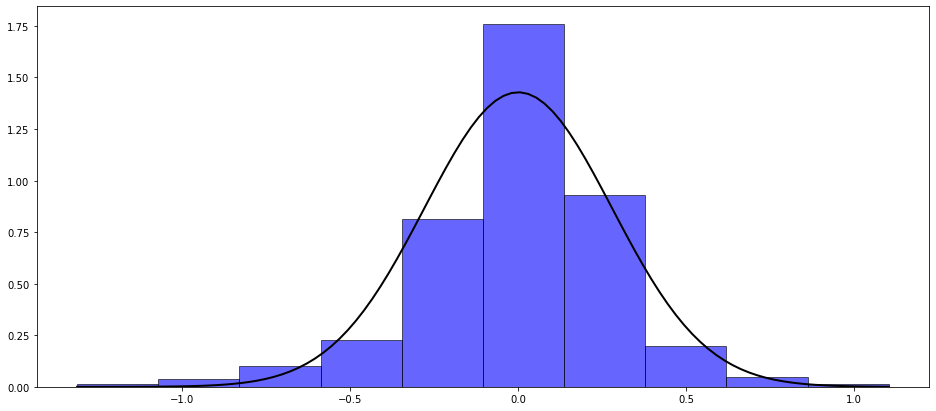

In [208]:
plt.figure(figsize=(16,7))
plt.hist(model1.resid, bins=10, density=True, alpha=0.6, color='b', edgecolor='black')

# Wykres gęstości rozkładu normalnego
xmin, xmax = min(model1.resid), max(model1.resid)
x = np.linspace(xmin, xmax, 100)
mu, std = np.mean(model1.resid), np.std(model1.resid)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

In [209]:
shapiro_test_statistic, shapiro_p_value = stats.shapiro(model1.resid)
print(f'Statystyka testu Shapiro-Wilka: {shapiro_test_statistic}')
print(f'Wartość P-Value: {shapiro_p_value}')

Statystyka testu Shapiro-Wilka: 0.9652059078216553
Wartość P-Value: 5.417813313051637e-17


<br>

In [210]:
bp_test = het_breuschpagan(model1.resid, X1)

print("Test Breuscha-Pagana:")
print(f"F-statistic: {bp_test[0]}")
print(f"P-value: {bp_test[1]}")

Test Breuscha-Pagana:
F-statistic: 203.8346261352693
P-value: 5.871855290193245e-33


In [211]:
data_matrix_1.corr().style.applymap(highlight_high_corr)

,Yrs,Const,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,DraftYear,Height,Weight
Yrs,1.000000,nan,-0.464535,0.885649,0.797646,0.707595,0.697417,0.575386,0.413103,0.165709,0.206158,0.492680,0.546278,0.482313,0.724483,0.609992,0.566081,0.406004,-0.195411,0.055656,0.139048
Const,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Pk,-0.464535,nan,1.000000,-0.444202,-0.468799,-0.466181,-0.438773,-0.361235,-0.207335,-0.095970,-0.127328,-0.238696,-0.308317,-0.341943,-0.534331,-0.519785,-0.446943,-0.324772,0.064047,-0.031824,-0.131934
G,0.885649,nan,-0.444202,1.000000,0.958808,0.873081,0.836029,0.728487,0.334924,0.163875,0.246529,0.478885,0.559548,0.665127,0.765334,0.664875,0.577373,0.480631,-0.242906,0.018614,0.096094
TOTMP,0.797646,nan,-0.468799,0.958808,1.000000,0.956577,0.861674,0.811605,0.285409,0.192877,0.266567,0.462628,0.580731,0.788797,0.829755,0.769318,0.599214,0.576621,-0.207329,0.004755,0.053781
TOTPTS,0.707595,nan,-0.466181,0.873081,0.956577,1.000000,0.821672,0.810174,0.260370,0.213305,0.289519,0.452885,0.585200,0.865456,0.808141,0.849520,0.576479,0.595381,-0.153059,0.000822,0.045765
TOTTRB,0.697417,nan,-0.438773,0.836029,0.861674,0.821672,1.000000,0.544068,0.409753,-0.014944,0.072622,0.479066,0.521480,0.719659,0.695835,0.643761,0.831989,0.309744,-0.176582,0.084520,0.317919
TOTAST,0.575386,nan,-0.361235,0.728487,0.811605,0.810174,0.544068,1.000000,0.112663,0.245739,0.294503,0.345570,0.511256,0.786142,0.680274,0.666241,0.297124,0.848195,-0.133160,-0.157977,-0.200522
FG%,0.413103,nan,-0.207335,0.334924,0.285409,0.260370,0.409753,0.112663,1.000000,-0.049426,-0.107495,0.744157,0.593472,0.206222,0.330626,0.313495,0.564462,0.037209,0.019520,0.091345,0.390038
3P%,0.165709,nan,-0.095970,0.163875,0.192877,0.213305,-0.014944,0.245739,-0.049426,1.000000,0.378466,0.190833,0.352721,0.166307,0.287415,0.307755,-0.114230,0.330811,0.170940,-0.120174,-0.372171


<br>

### Badanie korelacji logarytmów kwadratów reszt MNK  z jego zmiennymi objaśniającym

In [212]:
residue = np.log(np.square(model1.resid))

In [213]:
data_matrix_1['ln(eps^2)'] = residue
corr_matrix = data_matrix_1.iloc[:, 2:]
order = ['ln(eps^2)'] + [col for col in corr_matrix.columns if col != 'ln(eps^2)']
corr_matrix = corr_matrix[order]
corr_matrix.corr().style.applymap(highlight_high_corr)

,ln(eps^2),Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,DraftYear,Height,Weight
ln(eps^2),1.000000,0.239039,-0.229855,-0.220100,-0.205587,-0.203029,-0.138663,-0.128738,-0.059630,-0.013002,-0.107879,-0.140151,-0.110042,-0.258055,-0.225596,-0.204620,-0.116274,-0.048814,-0.071360,-0.035350
Pk,0.239039,1.000000,-0.444202,-0.468799,-0.466181,-0.438773,-0.361235,-0.207335,-0.095970,-0.127328,-0.238696,-0.308317,-0.341943,-0.534331,-0.519785,-0.446943,-0.324772,0.064047,-0.031824,-0.131934
G,-0.229855,-0.444202,1.000000,0.958808,0.873081,0.836029,0.728487,0.334924,0.163875,0.246529,0.478885,0.559548,0.665127,0.765334,0.664875,0.577373,0.480631,-0.242906,0.018614,0.096094
TOTMP,-0.220100,-0.468799,0.958808,1.000000,0.956577,0.861674,0.811605,0.285409,0.192877,0.266567,0.462628,0.580731,0.788797,0.829755,0.769318,0.599214,0.576621,-0.207329,0.004755,0.053781
TOTPTS,-0.205587,-0.466181,0.873081,0.956577,1.000000,0.821672,0.810174,0.260370,0.213305,0.289519,0.452885,0.585200,0.865456,0.808141,0.849520,0.576479,0.595381,-0.153059,0.000822,0.045765
TOTTRB,-0.203029,-0.438773,0.836029,0.861674,0.821672,1.000000,0.544068,0.409753,-0.014944,0.072622,0.479066,0.521480,0.719659,0.695835,0.643761,0.831989,0.309744,-0.176582,0.084520,0.317919
TOTAST,-0.138663,-0.361235,0.728487,0.811605,0.810174,0.544068,1.000000,0.112663,0.245739,0.294503,0.345570,0.511256,0.786142,0.680274,0.666241,0.297124,0.848195,-0.133160,-0.157977,-0.200522
FG%,-0.128738,-0.207335,0.334924,0.285409,0.260370,0.409753,0.112663,1.000000,-0.049426,-0.107495,0.744157,0.593472,0.206222,0.330626,0.313495,0.564462,0.037209,0.019520,0.091345,0.390038
3P%,-0.059630,-0.095970,0.163875,0.192877,0.213305,-0.014944,0.245739,-0.049426,1.000000,0.378466,0.190833,0.352721,0.166307,0.287415,0.307755,-0.114230,0.330811,0.170940,-0.120174,-0.372171
FT%,-0.013002,-0.127328,0.246529,0.266567,0.289519,0.072622,0.294503,-0.107495,0.378466,1.000000,0.178953,0.249857,0.206125,0.349841,0.377241,-0.029356,0.346340,0.054352,-0.120174,-0.308888


<br>

In [214]:
y2 = np.log(data_matrix['Yrs'])

X2 = data_matrix[[col for col in data_matrix.columns if col not in ['Yrs', 'TOTMP', 'TOTPTS', 'TOTTRB', 'TOTAST']]]
X2 = X2.astype(float)

In [215]:
model2 = sm.OLS(y2, X2).fit()

In [216]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Yrs   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     424.5
Date:                Tue, 14 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:52:27   Log-Likelihood:                -331.97
No. Observations:                1284   AIC:                             695.9
Df Residuals:                    1268   BIC:                             778.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Const          1.2940      2.295      0.564      0.573      -3.208       5.796
Pk            -0.0030      0.001     -4.460      0.000      -0.004      -0.002
G              0.0021   5.32e-05     38.959      0.000       0.002       0.002
FG%            1.0654      0.236      4.522      0.000       0.603       1.528
3P%            0.1236      0.089      1.395      0.163      -0.050       0.298
FT%           -0.0400      0.103     -0.387      0.699      -0.242       0.163
WS/48         -0.5900      0.430     -1.371      0.171      -1.434       0.254
BPM            0.0257      0.010      2.626      0.009       0.006       0.045
VORP          -0.0153      0.001    -11.888      0.000      -0.018      -0.013
MPG            0.0071      0.004      1.779      0.075      -0.001       0.015
PPG            0.0010      0.005      0.187      0.852      -0.010       0.012
RPG           -0.0031      0.009     -0.329      0.742      -0.021       0.015
APG            0.0148      0.011      1.291      0.197      -0.008       0.037
DraftYear     -0.0007      0.001     -0.602      0.547      -0.003       0.002
Height         0.0018      0.001      1.988      0.047    2.38e-05       0.004
Weight         0.0025      0.001      2.163      0.031       0.000       0.005
==============================================================================
Omnibus:                      185.899   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              443.297
Skew:                          -0.805   Prob(JB):                     5.49e-97
Kurtosis:                       5.387   Cond. No.                     5.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [217]:
round(model2.pvalues,3)

Const        0.573
Pk           0.000
G            0.000
FG%          0.000
3P%          0.163
FT%          0.699
WS/48        0.171
BPM          0.009
VORP         0.000
MPG          0.075
PPG          0.852
RPG          0.742
APG          0.197
DraftYear    0.547
Height       0.047
Weight       0.031
dtype: float64

In [218]:
data_matrix[[col for col in data_matrix.columns if col not in ['Yrs', 'TOTMP', 'TOTPTS', 'TOTTRB', 'TOTAST']]].corr().style.applymap(highlight_high_corr)

,Const,Pk,G,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,DraftYear,Height,Weight
Const,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Pk,nan,1.000000,-0.444202,-0.207335,-0.095970,-0.127328,-0.238696,-0.308317,-0.341943,-0.534331,-0.519785,-0.446943,-0.324772,0.064047,-0.031824,-0.131934
G,nan,-0.444202,1.000000,0.334924,0.163875,0.246529,0.478885,0.559548,0.665127,0.765334,0.664875,0.577373,0.480631,-0.242906,0.018614,0.096094
FG%,nan,-0.207335,0.334924,1.000000,-0.049426,-0.107495,0.744157,0.593472,0.206222,0.330626,0.313495,0.564462,0.037209,0.019520,0.091345,0.390038
3P%,nan,-0.095970,0.163875,-0.049426,1.000000,0.378466,0.190833,0.352721,0.166307,0.287415,0.307755,-0.114230,0.330811,0.170940,-0.120174,-0.372171
FT%,nan,-0.127328,0.246529,-0.107495,0.378466,1.000000,0.178953,0.249857,0.206125,0.349841,0.377241,-0.029356,0.346340,0.054352,-0.120174,-0.308888
WS/48,nan,-0.238696,0.478885,0.744157,0.190833,0.178953,1.000000,0.908570,0.433107,0.471637,0.471684,0.519979,0.269855,-0.001440,-0.017179,0.179544
BPM,nan,-0.308317,0.559548,0.593472,0.352721,0.249857,0.908570,1.000000,0.575156,0.625908,0.630664,0.499762,0.494350,0.008824,-0.086846,-0.019615
VORP,nan,-0.341943,0.665127,0.206222,0.166307,0.206125,0.433107,0.575156,1.000000,0.616571,0.690877,0.488225,0.575520,-0.096170,-0.035293,0.022618
MPG,nan,-0.534331,0.765334,0.330626,0.287415,0.349841,0.471637,0.625908,0.616571,1.000000,0.915221,0.672578,0.679048,-0.016993,-0.017017,-0.006887


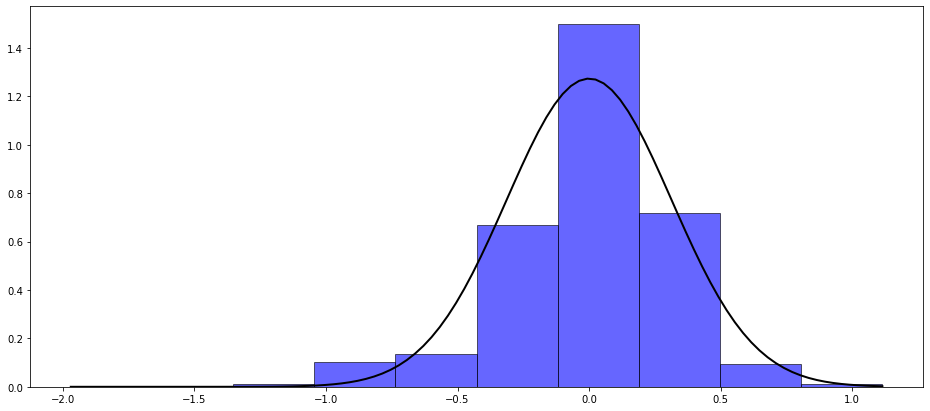

In [219]:
plt.figure(figsize=(16,7))
plt.hist(model2.resid, bins=10, density=True, alpha=0.6, color='b', edgecolor='black')

# Wykres gęstości rozkładu normalnego
xmin, xmax = min(model2.resid), max(model2.resid)
x = np.linspace(xmin, xmax, 100)
mu, std = np.mean(model2.resid), np.std(model2.resid)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

In [220]:
shapiro_test_statistic, shapiro_p_value = stats.shapiro(model2.resid)
print(f'Statystyka testu Shapiro-Wilka: {shapiro_test_statistic}')
print(f'Wartość P-Value: {shapiro_p_value}')

Statystyka testu Shapiro-Wilka: 0.9570370316505432
Wartość P-Value: 5.583739519395665e-19


In [221]:
bp_test = het_breuschpagan(model2.resid, X2)

print("Test Breuscha-Pagana:")
print(f"F-statistic: {bp_test[0]}")
print(f"P-value: {bp_test[1]}")

Test Breuscha-Pagana:
F-statistic: 309.52460845602866
P-value: 5.844992803835122e-57


<br>

## Uogólniona metoda najmniejszych kwadratów

#### Estymacja macierzy kowariancji

In [222]:
y1.shape

(1284,)

In [223]:
ols_resid = model1.resid
res_fit = sm.OLS(list(ols_resid[1:]), list(ols_resid[:-1])).fit()
rho = res_fit.params

from scipy.linalg import toeplitz
order = toeplitz(np.arange(1284))
sigma = rho**order

In [224]:
model_GLS = sm.GLS(y1, X1, sigma).fit()

In [225]:
model_GLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.867
Model:                            GLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     432.9
Date:                Tue, 14 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:52:28   Log-Likelihood:                -183.99
No. Observations:                1284   AIC:                             408.0
Df Residuals:                    1264   BIC:                             511.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7282      2.096      2.255      0.024       0.616       8.841
x1            -0.0028      0.001     -4.479      0.000      -0.004      -0.002
x2             0.0040      0.000     33.896      0.000       0.004       0.004
x3         -9.557e-05   8.76e-06    -10.910      0.000      -0.000   -7.84e-05
x4          2.322e-05   1.32e-05      1.760      0.079   -2.66e-06    4.91e-05
x5         -3.873e-05   1.92e-05     -2.017      0.044   -7.64e-05   -1.06e-06
x6           4.81e-05   2.69e-05      1.786      0.074   -4.73e-06       0.000
x7             0.4729      0.213      2.219      0.027       0.055       0.891
x8             0.1187      0.079      1.497      0.135      -0.037       0.274
x9            -0.2644      0.094     -2.823      0.005      -0.448      -0.081
x10           -0.1867      0.393     -0.475      0.635      -0.958       0.585
x11            0.0079      0.009      0.861      0.390      -0.010       0.026
x12            0.0001      0.002      0.065      0.948      -0.004       0.004
x13            0.0300      0.005      5.995      0.000       0.020       0.040
x14            0.0007      0.009      0.086      0.932      -0.016       0.018
x15            0.0183      0.014      1.275      0.202      -0.010       0.047
x16           -0.0264      0.019     -1.400      0.162      -0.063       0.011
x17           -0.0023      0.001     -2.235      0.026      -0.004      -0.000
x18            0.0018      0.001      2.168      0.030       0.000       0.003
x19            0.0007      0.001      0.691      0.490      -0.001       0.003
==============================================================================
Omnibus:                      125.051   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.417
Skew:                          -0.567   Prob(JB):                     5.24e-64
Kurtosis:                       5.039   Cond. No.                     4.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

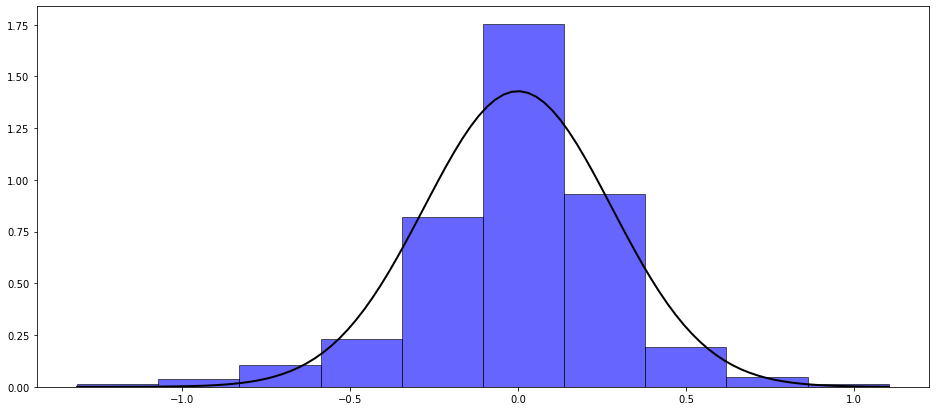

In [226]:
plt.figure(figsize=(16,7))
plt.hist(model_GLS.resid, bins=10, density=True, alpha=0.6, color='b', edgecolor='black')

# Wykres gęstości rozkładu normalnego
xmin, xmax = min(model_GLS.resid), max(model_GLS.resid)
x = np.linspace(xmin, xmax, 100)
mu, std = np.mean(model_GLS.resid), np.std(model_GLS.resid)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

In [227]:
shapiro_test_statistic, shapiro_p_value = stats.shapiro(model_GLS.resid)
print(f'Statystyka testu Shapiro-Wilka: {shapiro_test_statistic}')
print(f'Wartość P-Value: {shapiro_p_value}')

Statystyka testu Shapiro-Wilka: 0.9651919603347778
Wartość P-Value: 5.372406060506151e-17


In [228]:
bp_test = het_breuschpagan(model_GLS.resid, X1)

print("Test Breuscha-Pagana:")
print(f"F-statistic: {bp_test[0]}")
print(f"P-value: {bp_test[1]}")

Test Breuscha-Pagana:
F-statistic: 204.17805534759648
P-value: 5.015913516801583e-33


In [229]:
data_matrix.corr().style.applymap(highlight_high_corr)

,Yrs,Const,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,DraftYear,Height,Weight
Yrs,1.000000,nan,-0.430655,0.973188,0.914607,0.826973,0.805451,0.679456,0.345822,0.143805,0.219559,0.477559,0.543719,0.621056,0.720850,0.620075,0.560831,0.432523,-0.266797,0.031737,0.121214
Const,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Pk,-0.430655,nan,1.000000,-0.444202,-0.468799,-0.466181,-0.438773,-0.361235,-0.207335,-0.095970,-0.127328,-0.238696,-0.308317,-0.341943,-0.534331,-0.519785,-0.446943,-0.324772,0.064047,-0.031824,-0.131934
G,0.973188,nan,-0.444202,1.000000,0.958808,0.873081,0.836029,0.728487,0.334924,0.163875,0.246529,0.478885,0.559548,0.665127,0.765334,0.664875,0.577373,0.480631,-0.242906,0.018614,0.096094
TOTMP,0.914607,nan,-0.468799,0.958808,1.000000,0.956577,0.861674,0.811605,0.285409,0.192877,0.266567,0.462628,0.580731,0.788797,0.829755,0.769318,0.599214,0.576621,-0.207329,0.004755,0.053781
TOTPTS,0.826973,nan,-0.466181,0.873081,0.956577,1.000000,0.821672,0.810174,0.260370,0.213305,0.289519,0.452885,0.585200,0.865456,0.808141,0.849520,0.576479,0.595381,-0.153059,0.000822,0.045765
TOTTRB,0.805451,nan,-0.438773,0.836029,0.861674,0.821672,1.000000,0.544068,0.409753,-0.014944,0.072622,0.479066,0.521480,0.719659,0.695835,0.643761,0.831989,0.309744,-0.176582,0.084520,0.317919
TOTAST,0.679456,nan,-0.361235,0.728487,0.811605,0.810174,0.544068,1.000000,0.112663,0.245739,0.294503,0.345570,0.511256,0.786142,0.680274,0.666241,0.297124,0.848195,-0.133160,-0.157977,-0.200522
FG%,0.345822,nan,-0.207335,0.334924,0.285409,0.260370,0.409753,0.112663,1.000000,-0.049426,-0.107495,0.744157,0.593472,0.206222,0.330626,0.313495,0.564462,0.037209,0.019520,0.091345,0.390038
3P%,0.143805,nan,-0.095970,0.163875,0.192877,0.213305,-0.014944,0.245739,-0.049426,1.000000,0.378466,0.190833,0.352721,0.166307,0.287415,0.307755,-0.114230,0.330811,0.170940,-0.120174,-0.372171


<br>